Setting up an environment for work.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

Upload dataset

In [2]:
file_path = "datasetV2.csv" 
data = pd.read_csv(file_path)

Let's show the dataset

In [3]:
data.head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689,12331,1.3,6728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7185,0,3.6,2554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8289,190714,1.5,6865,15600000,359000000,149,4.3,Wednesday,Saturday


Data cleaning

In [4]:
# Check for missing values
print("Number of missing values before cleaning:")
print(data.isnull().sum())

# Remove rows with missing values in the '2ND_MOST_STREAMED_GAME' column
cleaned_data = data.dropna(subset=['2ND_MOST_STREAMED_GAME'])

# Remove rows where any cell contains a zero
cleaned_data = cleaned_data[(cleaned_data != 0).all(axis=1)]

print("Number of rows before removing zeros:", len(data))
print("Number of rows after removing zeros:", len(cleaned_data))

# Verify data after cleaning
print("\nNumber of missing values after cleaning:")
print(cleaned_data.isnull().sum())


Number of missing values before cleaning:
RANK                               0
NAME                               0
LANGUAGE                           0
TYPE                               0
MOST_STREAMED_GAME                 0
2ND_MOST_STREAMED_GAME            77
AVERAGE_STREAM_DURATION            0
FOLLOWERS_GAINED_PER_STREAM        0
AVG_VIEWERS_PER_STREAM             0
AVG_GAMES_PER_STREAM               0
TOTAL_TIME_STREAMED                0
TOTAL_FOLLOWERS                    0
TOTAL_VIEWS                        0
TOTAL_GAMES_STREAMED               0
ACTIVE_DAYS_PER_WEEK               0
MOST_ACTIVE_DAY                    0
DAY_WITH_MOST_FOLLOWERS_GAINED     0
dtype: int64
Number of rows before removing zeros: 999
Number of rows after removing zeros: 858

Number of missing values after cleaning:
RANK                              0
NAME                              0
LANGUAGE                          0
TYPE                              0
MOST_STREAMED_GAME                0
2ND_MOST_ST

Descriptive statistics

In [5]:
# Descriptive statistics for selected numerical fields
fields_to_analyze = ['AVERAGE_STREAM_DURATION', 'TOTAL_FOLLOWERS', 'TOTAL_VIEWS']
stats = cleaned_data[fields_to_analyze].describe().loc[['mean', '50%', 'std']]
stats.rename(index={'50%': 'median'}, inplace=True)
print("\nDescriptive Statistics:")
print(stats)



Descriptive Statistics:
        AVERAGE_STREAM_DURATION  TOTAL_FOLLOWERS   TOTAL_VIEWS
mean                   5.689044     1.028017e+06  3.386772e+07
median                 5.300000     5.010000e+05  1.020000e+07
std                    2.711426     1.813946e+06  6.570819e+07


Plotting histograms

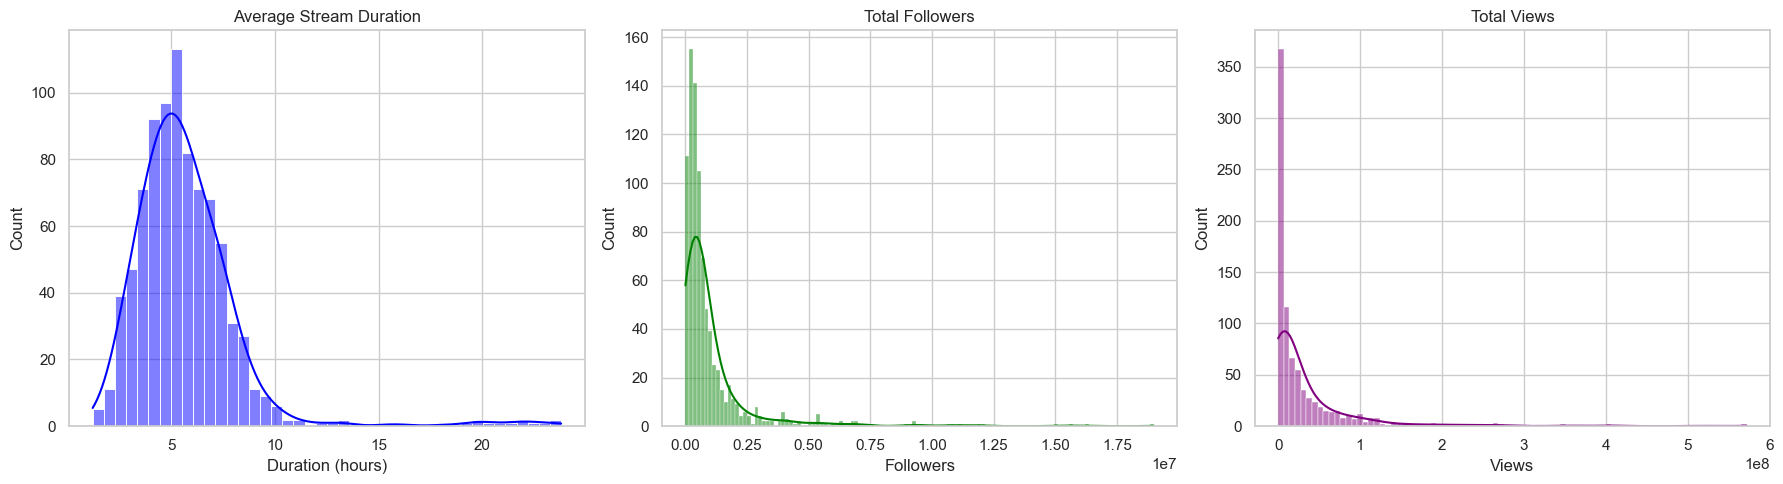

In [6]:
# Plot histograms for numerical fields
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for AVERAGE_STREAM_DURATION
sns.histplot(cleaned_data['AVERAGE_STREAM_DURATION'], kde=True, ax=axes[0], color="blue")
axes[0].set_title('Average Stream Duration')
axes[0].set_xlabel('Duration (hours)')

# Histogram for TOTAL_FOLLOWERS
sns.histplot(cleaned_data['TOTAL_FOLLOWERS'], kde=True, ax=axes[1], color="green")
axes[1].set_title('Total Followers')
axes[1].set_xlabel('Followers')

# Histogram for TOTAL_VIEWS
sns.histplot(cleaned_data['TOTAL_VIEWS'], kde=True, ax=axes[2], color="purple")
axes[2].set_title('Total Views')
axes[2].set_xlabel('Views')

plt.tight_layout()
plt.show()


Data transformation

Adding a new column

In [41]:
# Add a new column: Followers per Hour
cleaned_data['FOLLOWERS_PER_HOUR'] = cleaned_data['TOTAL_FOLLOWERS'] / cleaned_data['TOTAL_TIME_STREAMED']
print("\nNew column added: Followers per Hour.")
print(cleaned_data[['NAME', 'FOLLOWERS_PER_HOUR']].head())



New column added: Followers per Hour.
        NAME  FOLLOWERS_PER_HOUR
0   kaicenat         2256.279268
1     jynxzi          685.143333
2    caedrel          118.460166
4       ibai         2272.396213
5  auronplay         3636.769299


Visualising transformed data

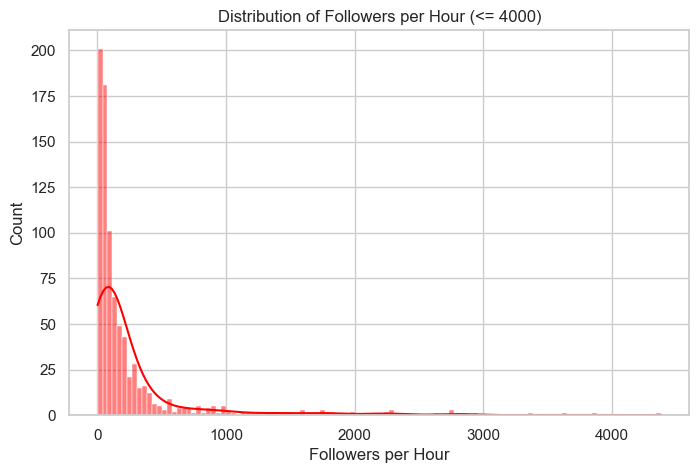

In [42]:
# Plot distribution of Followers per Hour with a limit of 5000
plt.figure(figsize=(8, 5))

# Filter data for the plot
filtered_data = cleaned_data[cleaned_data['FOLLOWERS_PER_HOUR'] <= 5000]

# Plot the histogram
sns.histplot(filtered_data['FOLLOWERS_PER_HOUR'], kde=True, color='red')
plt.title('Distribution of Followers per Hour (<= 4000)')
plt.xlabel('Followers per Hour')
plt.show()


Stream Language Distribution Analysis with Aggregated Minor Categories

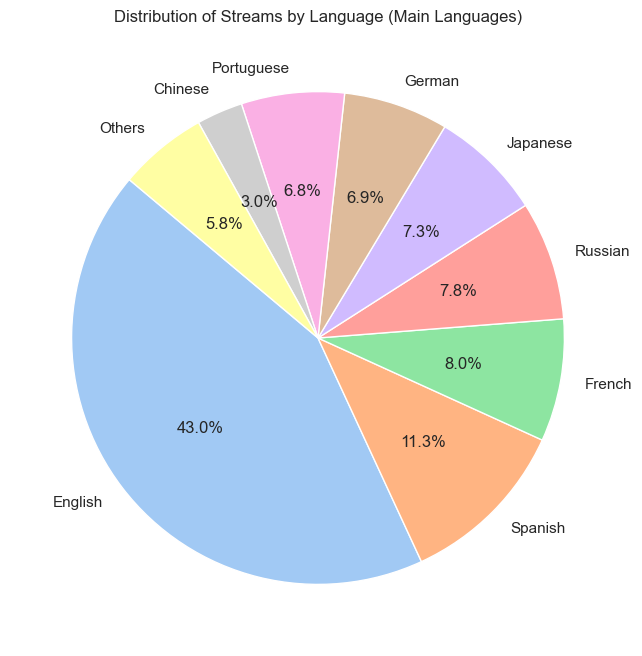

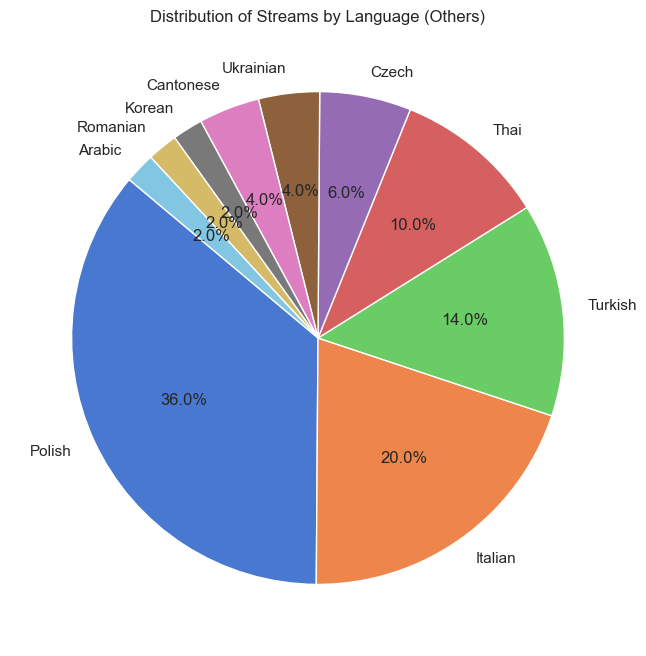

In [43]:
# Calculate language distribution and combine languages with less than 3% into "Others"
language_counts = cleaned_data['LANGUAGE'].value_counts(normalize=True) * 100

# Separate "Others" and main languages
main_languages = language_counts[language_counts >= 3]
others_languages = language_counts[language_counts < 3]

# Add "Others" as a separate category
main_languages['Others'] = others_languages.sum()

# Pie chart for main languages
plt.figure(figsize=(8, 8))
plt.pie(main_languages, labels=main_languages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Streams by Language (Main Languages)')
plt.show()

# Pie chart for "Others" category
plt.figure(figsize=(8, 8))
plt.pie(others_languages, labels=others_languages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Distribution of Streams by Language (Others)')
plt.show()


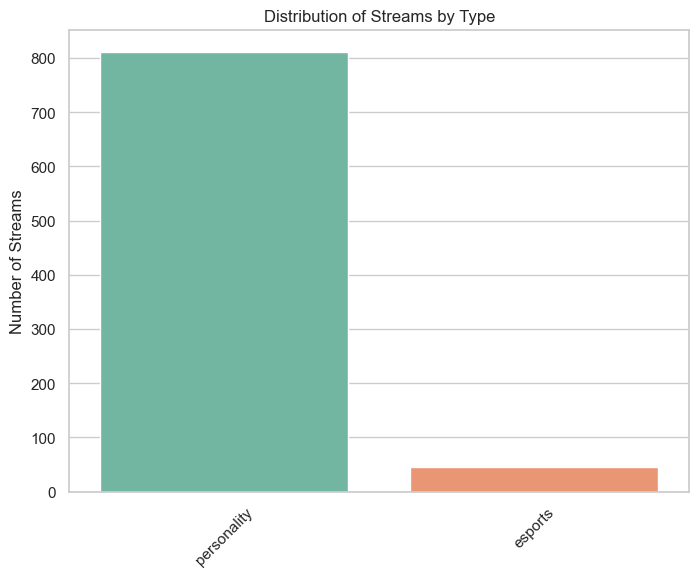

In [44]:
# Count the occurrences of each TYPE
type_counts = cleaned_data['TYPE'].value_counts()

# Create a bar chart for TYPE distribution with different colors for each bar
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='Set2', legend=False)

# Add labels and title
plt.title('Distribution of Streams by Type')
plt.xlabel('')
plt.ylabel('Number of Streams')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()



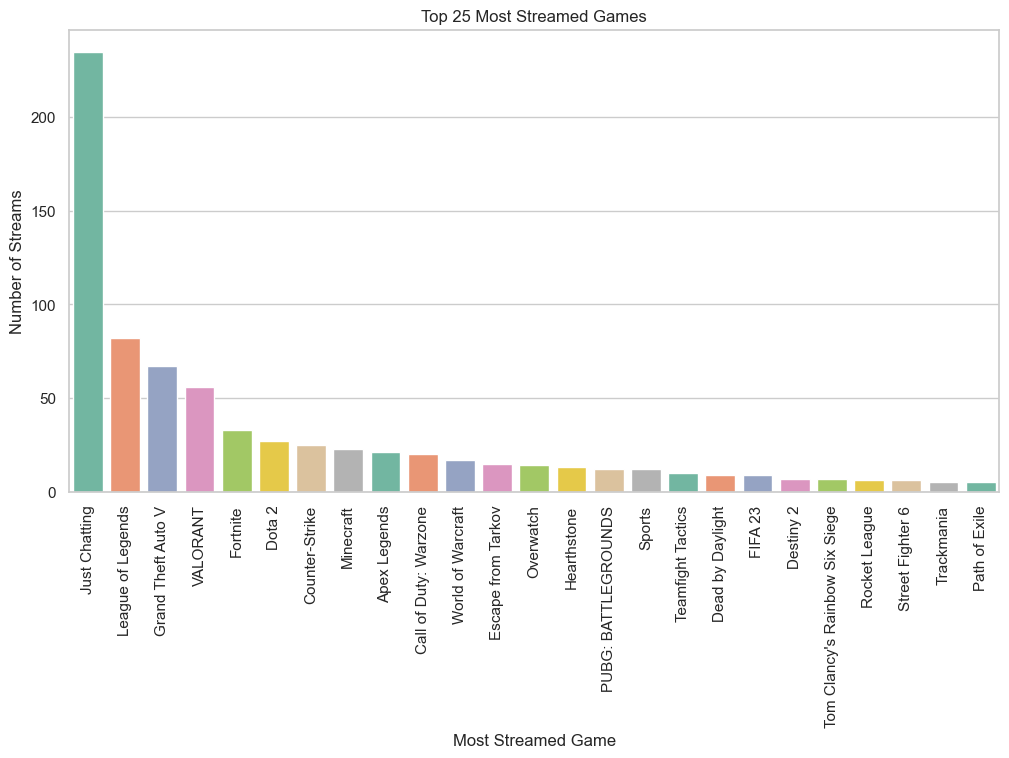

In [45]:
# Count the occurrences of each "Most Streamed Game"
most_streamed_counts = cleaned_data['MOST_STREAMED_GAME'].value_counts()

# Get the top 25 most streamed games
top_25_most_streamed = most_streamed_counts.head(25)

# Create a bar chart for the top 25 most streamed games with the Set2 palette
plt.figure(figsize=(12, 6))
sns.barplot(x=top_25_most_streamed.index, y=top_25_most_streamed.values, hue=top_25_most_streamed.index, palette='Set2', legend=False)

# Add labels and title
plt.title('Top 25 Most Streamed Games')
plt.xlabel('Most Streamed Game')
plt.ylabel('Number of Streams')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



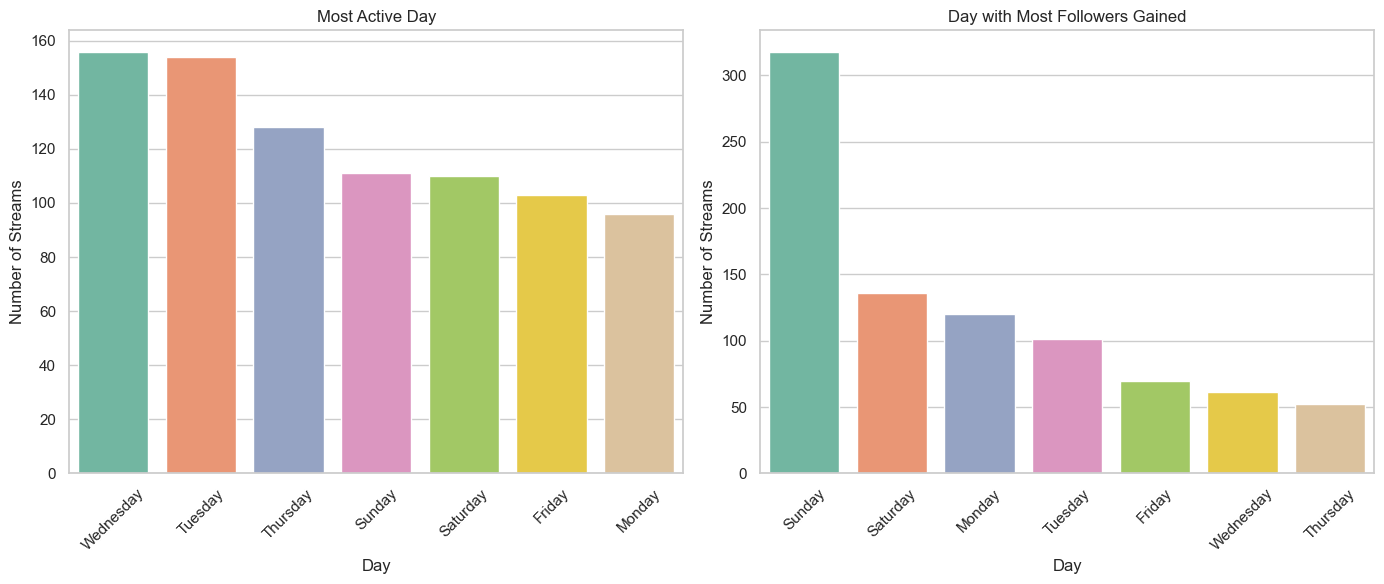

In [47]:
# Count the occurrences of "Most Active Day" and "Day with Most Followers Gained"
most_active_day_counts = cleaned_data['MOST_ACTIVE_DAY'].value_counts()
most_followers_day_counts = cleaned_data['DAY_WITH_MOST_FOLLOWERS_GAINED'].value_counts()

# Create two side-by-side bar charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for "Most Active Day"
sns.barplot(x=most_active_day_counts.index, y=most_active_day_counts.values, hue=most_active_day_counts.index, palette='Set2', ax=axes[0], legend=False)
axes[0].set_title('Most Active Day')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Number of Streams')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for "Day with Most Followers Gained"
sns.barplot(x=most_followers_day_counts.index, y=most_followers_day_counts.values, hue=most_followers_day_counts.index, palette='Set2', ax=axes[1], legend=False)
axes[1].set_title('Day with Most Followers Gained')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Number of Streams')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Assume that the more time streamed means the streamer gets more followers

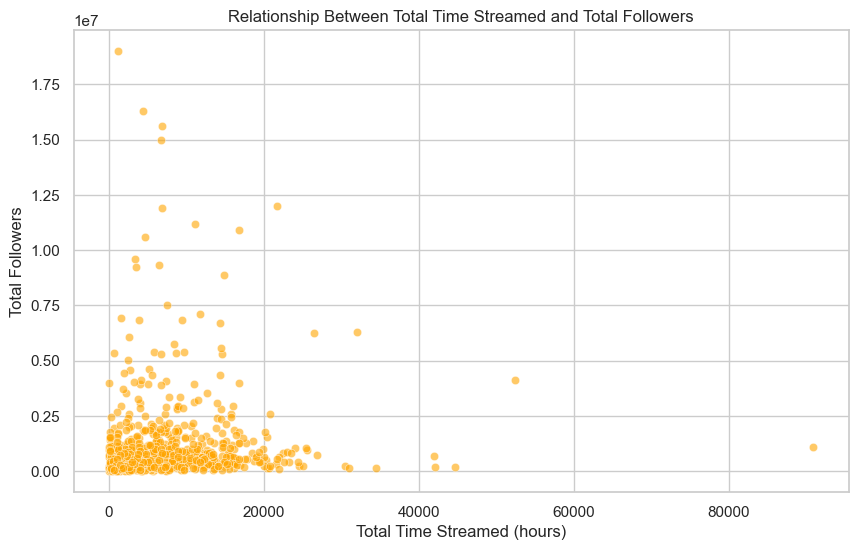

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleaned_data, x='TOTAL_TIME_STREAMED', y='TOTAL_FOLLOWERS', alpha=0.6, color='orange')
plt.title('Relationship Between Total Time Streamed and Total Followers')
plt.xlabel('Total Time Streamed (hours)')
plt.ylabel('Total Followers')
plt.show()


As we can see, our hypothesis is false. Total time streamed don't affect on followers